In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
% matplotlib inline

import logomaker

In [2]:
!ls

19.06.04_neighbor_logos.ipynb full-wt_IM_crp.txt
full-wt_IM_NBR_crp.txt        full-wt_IM_rnap.txt
full-wt_IM_NBR_rnap.txt       new_d.txt


In [3]:
mat_df = pd.read_csv('full-wt_IM_rnap.txt', delim_whitespace=True, index_col=0)
mat_df.reset_index(inplace=True, drop=True)
mat_df.columns = [col[-1] for col in mat_df.columns]
mat_df.head()

,A,C,G,T
0,0.016361,-0.018321,0.011844,-0.009884
1,-0.031695,0.068839,0.071180,-0.108324
2,-0.067502,-0.079989,-0.089596,0.237088
3,0.007669,-0.194685,0.036931,0.150085
4,-0.221385,-0.155928,0.285624,0.091689


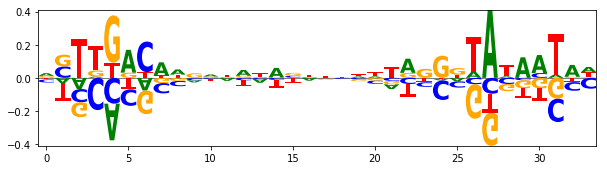

In [4]:
logomaker.Logo(mat_df)

In [5]:
nbr_df = pd.read_csv('full-wt_IM_NBR_rnap.txt', delim_whitespace=True, index_col=0)
nbr_df.reset_index(inplace=True, drop=True)
nbr_df.columns = [col[-2:] for col in nbr_df.columns]
nbr_df.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,0.000015,0.005670,0.002334,0.019205,0.002276,-0.022185,0.008342,-0.027852,-0.004125,-0.000362,0.018002,-0.001194,0.017567,-0.017318,0.035556,-0.035925
1,-0.020646,0.016203,0.017358,0.002816,-0.011185,-0.027766,-0.063192,0.067946,0.024324,0.003826,-0.011858,0.047941,0.004270,-0.025852,0.023078,-0.047262
2,-0.015428,0.050286,-0.003425,-0.034669,-0.007079,0.023330,-0.018365,-0.031476,-0.029588,0.006663,-0.010418,-0.001271,0.026023,-0.062618,0.026227,0.081809
3,-0.032348,-0.009535,-0.000497,0.016307,-0.007326,0.023559,0.029921,-0.028494,-0.012080,-0.029621,0.004959,0.030761,-0.077447,-0.059736,0.102396,0.049180
4,-0.057368,-0.003975,-0.005092,-0.062766,-0.031789,-0.045901,-0.009978,0.012334,0.105665,0.042773,-0.037555,0.025896,0.020121,-0.004543,0.037272,0.014903


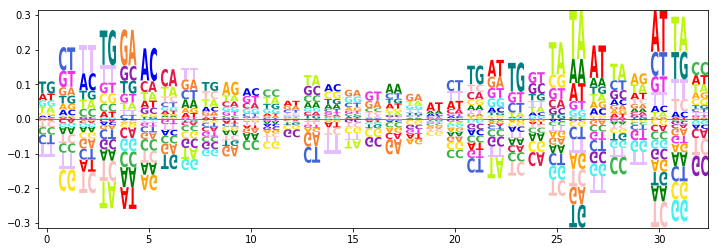

In [6]:
logomaker.Logo(nbr_df, width=.8, figsize=[12,4])

In [7]:
d = {}
L = len(nbr_df)+1

for pos in range(1,L+1):
    d[(pos,)] = {}
    for col in 'ACGT':  
        d[(pos,)][col] = 0.0

for pos in range(1,L):
    d[(pos,pos+1)] = {}
    for col in nbr_df.columns:
        d[(pos,pos+1)][col] = nbr_df.loc[pos-1,col]
d

{(1,): {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 0.0},
 (1, 2): {'AA': 1.4999999999999999e-05,
  'AC': 0.0056700000000000006,
  'AG': 0.002334,
  'AT': 0.019205,
  'CA': 0.0022760000000000002,
  'CC': -0.022185,
  'CG': 0.008342,
  'CT': -0.027852,
  'GA': -0.004125,
  'GC': -0.000362,
  'GG': 0.018002,
  'GT': -0.001194,
  'TA': 0.017567,
  'TC': -0.017318,
  'TG': 0.035556,
  'TT': -0.035925},
 (2,): {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 0.0},
 (2, 3): {'AA': -0.020646,
  'AC': 0.016203,
  'AG': 0.017358000000000002,
  'AT': 0.002816,
  'CA': -0.011184999999999999,
  'CC': -0.027766000000000002,
  'CG': -0.063192,
  'CT': 0.067946,
  'GA': 0.024324000000000002,
  'GC': 0.003826,
  'GG': -0.011858,
  'GT': 0.047941000000000004,
  'TA': 0.00427,
  'TC': -0.025851999999999997,
  'TG': 0.023078,
  'TT': -0.047262},
 (3,): {'A': 0.0, 'C': 0.0, 'G': 0.0, 'T': 0.0},
 (3, 4): {'AA': -0.015428,
  'AC': 0.050286000000000004,
  'AG': -0.003425,
  'AT': -0.034669,
  'CA': -0.007079,
  'CC': 0.02333,
  '

In [8]:
import itertools
def calculateHG(alphabet, sequenceLength, modelParametersDict):
    #modelParametersDict=calculateCG(alphabet, sequenceLength, inputModelParametersDict)

    #set row sums in 2D arrays equal 0:
    for position in range(1, sequenceLength):
        for character in alphabet:
            # print(position, character)
            K = np.mean([modelParametersDict[(position, position + 1)][character + characterPrime] for characterPrime in alphabet])
            # print(K)
            modelParametersDict[(position,)][character] = modelParametersDict[(position,)][character] + K
            # print(modelParametersDict[(position,)][character])
            for characterPrime in alphabet:
                modelParametersDict[(position, position + 1)][character + characterPrime] = modelParametersDict[(position, position + 1)][character + characterPrime] - K
            # print(sum([modelParametersDict[(position,position+1)][character+character2] for character2 in alphabet]))

    # set column sums in 2D arrays equal 0:
    for position in range(2, sequenceLength + 1):
        for character in alphabet:
            # print(position, character)
            K = np.mean([modelParametersDict[(position - 1, position)][characterPrime + character] for characterPrime in alphabet])
            # print(K)
            modelParametersDict[(position,)][character] = modelParametersDict[(position,)][character] + K
            # print(modelParametersDict[(position,)][character])
            for characterPrime in alphabet:
                modelParametersDict[(position - 1, position)][characterPrime + character] = modelParametersDict[(position - 1, position)][characterPrime + character] - K
            # print(sum([modelParametersDict[(position-1,position)][character2+character] for character2 in alphabet]))



    #set all 1D array sums equal:
    l=[modelParametersDict[(position,)].values() for position in range(1, sequenceLength+1)]
    arraySumInCG=  sum(list(itertools.chain.from_iterable(l)))/sequenceLength
    for position in range(1, sequenceLength):
        K=(arraySumInCG-sum(modelParametersDict[(position,)].values()))/len(alphabet)
        for characterPrime in alphabet:
            modelParametersDict[(position,)][character] = modelParametersDict[(position,)][character]+K
            modelParametersDict[(position+1,)][character] = modelParametersDict[(position+1,)][character] - K


    return modelParametersDict

'''
READ IN PARAMETERS OF INDEPENDENT SITES AND NEAREST NEIGHBOR MODEL FROM TEXT FILE

INPUT: each line in input file has the format "string of characters  weight corresponding to having given string as
substring in seq starting at position 1     weight corresponding to having given string as substring in seq starting
at position 2     ...."

OUTPUT:  alphabet, seqeunceLength,'modelParametersDict' dictionary of format {(positions): {substring: weight}}

    '''
def readInModelParameters(inputFile):
    alphabet=[]
    modelParametersDict={}
    file = open(inputFile, "r")
    for line in file:
        entries = line.split()

        substring=entries[0].strip().split(":")[0]
        for character in substring:
            if character not in alphabet:
                alphabet.append(character)

        length=len(substring)
        pos=1
        for entry in entries[1:]:
            positions=tuple(range(pos,pos+length))
            try:
                modelParametersDict[positions][substring]=float(entry)
            except KeyError:
                modelParametersDict[positions]={}
                modelParametersDict[positions][substring]=float(entry)
            pos += 1
    file.close()
    sequenceLength=pos
    return alphabet, sequenceLength, modelParametersDict




'''
WRITE MODEL PARAMETERS FROM modelParametersDict TO FILE

INPUT: 'modelParametersDict' dictionary of format {(positions): {substring: weight}}

OUTPUT:  text file in which each line has the format "string of characters  weight corresponding to having given string as
substring in seq starting at position 1     weight corresponding to having given string as substring in seq starting
at position 2     ...."

    '''
def writeModelParametersDictToFile(alphabet, sequenceLength, modelParametersDict, outputFile):
    f = open(outputFile, 'w')

    for character in alphabet:
        f.write(character + '\t')
        for position in range(1, sequenceLength):
            f.write(str(modelParametersDict[(position,)][character]) + '\t')
        position = sequenceLength
        f.write(str(modelParametersDict[(position,)][character]) + '\n')

    for characterPair in [''.join(i) for i in itertools.product(alphabet, repeat=2)]:
        f.write(characterPair + '\t')
        for position in range(1, sequenceLength - 1):
            f.write(str(modelParametersDict[(position, position + 1)][characterPair]) + '\t')
        position = sequenceLength - 1
        f.write(str(modelParametersDict[(position, position + 1)][characterPair]) + '\n')
    f.close()

    return 0


In [9]:
new_d = calculateHG('ACGT', L, d)

In [10]:
writeModelParametersDictToFile('ACGT', L, new_d, 'new_d.txt')

0

In [11]:
!ls

19.06.04_neighbor_logos.ipynb full-wt_IM_crp.txt
full-wt_IM_NBR_crp.txt        full-wt_IM_rnap.txt
full-wt_IM_NBR_rnap.txt       new_d.txt


In [12]:
new_df = pd.read_csv('new_d.txt', delim_whitespace=True, header=None, index_col=0).T
new_df

,A,C,G,T,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
1,0.006806,-0.009855,0.003080,-0.000031,-0.010724,0.007413,-0.020530,0.023841,0.008198,-0.003781,0.002139,-0.006555,-0.011138,0.005107,-0.001136,0.007168,0.013664,-0.008739,0.019528,-0.024453
2,0.007866,-0.017098,0.032116,-0.022884,-0.023769,0.020668,0.022079,-0.018977,-0.001826,-0.010819,-0.045989,0.058635,0.009075,-0.003835,-0.019263,0.014023,0.016521,-0.006013,0.043173,-0.053681
3,-0.001618,-0.016795,-0.017307,0.035720,-0.008101,0.046680,-0.001121,-0.037458,0.007837,0.027312,-0.008472,-0.026677,-0.014416,0.010901,-0.000269,0.003784,0.014681,-0.084893,0.009862,0.060351
4,-0.013036,0.008830,-0.002991,0.007197,0.006470,0.015816,-0.028174,0.005887,0.020559,0.037977,-0.008689,-0.049848,0.021715,-0.009293,-0.027741,0.015318,-0.048745,-0.044501,0.064603,0.028643
5,-0.064600,-0.037667,0.068390,0.033878,-0.034225,0.031237,0.031046,-0.028058,-0.022113,-0.024156,0.012694,0.033576,0.062313,0.011490,-0.067912,-0.005891,-0.005975,-0.018570,0.024172,0.000373
6,0.018315,-0.005823,-0.007676,-0.004816,-0.044427,0.075279,-0.045676,0.014824,0.034153,-0.042326,0.019454,-0.011280,-0.015662,0.010571,0.008262,-0.003173,0.025936,-0.043524,0.017960,-0.000371
7,0.001233,0.023005,-0.017239,-0.006999,-0.009334,-0.011969,0.010029,0.011275,0.026654,-0.028950,-0.001669,0.003966,-0.035917,0.015378,0.024985,-0.004445,0.018598,0.025542,-0.033344,-0.010795
8,0.025977,-0.010343,-0.011816,-0.003819,0.008530,-0.001235,0.012078,-0.019373,-0.008447,0.000910,-0.005338,0.012875,0.033038,-0.009753,-0.014871,-0.008414,-0.033121,0.010078,0.008131,0.014911
9,0.007383,-0.023560,-0.022253,0.038430,-0.011197,0.009566,-0.003887,0.005518,-0.006004,-0.003918,0.005925,0.003997,0.018696,-0.009847,-0.009339,0.000489,-0.001496,0.004199,0.007301,-0.010004
10,0.007703,0.000909,-0.000537,-0.008074,-0.014673,-0.003982,0.029231,-0.010576,0.018225,0.007213,-0.017965,-0.007474,-0.027542,0.006149,0.007189,0.014203,0.023989,-0.009380,-0.018456,0.003847


In [13]:
new_mat_df = new_df.iloc[:,:4]
new_mat_df

,A,C,G,T
1,0.006806,-0.009855,0.003080,-0.000031
2,0.007866,-0.017098,0.032116,-0.022884
3,-0.001618,-0.016795,-0.017307,0.035720
4,-0.013036,0.008830,-0.002991,0.007197
5,-0.064600,-0.037667,0.068390,0.033878
6,0.018315,-0.005823,-0.007676,-0.004816
7,0.001233,0.023005,-0.017239,-0.006999
8,0.025977,-0.010343,-0.011816,-0.003819
9,0.007383,-0.023560,-0.022253,0.038430
10,0.007703,0.000909,-0.000537,-0.008074


In [14]:
new_nbr_df = new_df.iloc[:-1,4:]
new_nbr_df

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
1,-0.010724,0.007413,-0.020530,0.023841,0.008198,-0.003781,0.002139,-0.006555,-0.011138,0.005107,-0.001136,0.007168,0.013664,-0.008739,0.019528,-0.024453
2,-0.023769,0.020668,0.022079,-0.018977,-0.001826,-0.010819,-0.045989,0.058635,0.009075,-0.003835,-0.019263,0.014023,0.016521,-0.006013,0.043173,-0.053681
3,-0.008101,0.046680,-0.001121,-0.037458,0.007837,0.027312,-0.008472,-0.026677,-0.014416,0.010901,-0.000269,0.003784,0.014681,-0.084893,0.009862,0.060351
4,0.006470,0.015816,-0.028174,0.005887,0.020559,0.037977,-0.008689,-0.049848,0.021715,-0.009293,-0.027741,0.015318,-0.048745,-0.044501,0.064603,0.028643
5,-0.034225,0.031237,0.031046,-0.028058,-0.022113,-0.024156,0.012694,0.033576,0.062313,0.011490,-0.067912,-0.005891,-0.005975,-0.018570,0.024172,0.000373
6,-0.044427,0.075279,-0.045676,0.014824,0.034153,-0.042326,0.019454,-0.011280,-0.015662,0.010571,0.008262,-0.003173,0.025936,-0.043524,0.017960,-0.000371
7,-0.009334,-0.011969,0.010029,0.011275,0.026654,-0.028950,-0.001669,0.003966,-0.035917,0.015378,0.024985,-0.004445,0.018598,0.025542,-0.033344,-0.010795
8,0.008530,-0.001235,0.012078,-0.019373,-0.008447,0.000910,-0.005338,0.012875,0.033038,-0.009753,-0.014871,-0.008414,-0.033121,0.010078,0.008131,0.014911
9,-0.011197,0.009566,-0.003887,0.005518,-0.006004,-0.003918,0.005925,0.003997,0.018696,-0.009847,-0.009339,0.000489,-0.001496,0.004199,0.007301,-0.010004
10,-0.014673,-0.003982,0.029231,-0.010576,0.018225,0.007213,-0.017965,-0.007474,-0.027542,0.006149,0.007189,0.014203,0.023989,-0.009380,-0.018456,0.003847


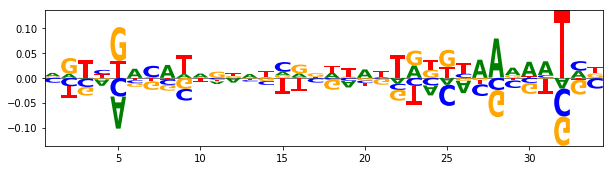

In [15]:
logomaker.Logo(new_mat_df)

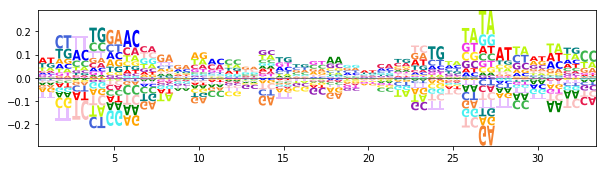

In [16]:
logomaker.Logo(new_nbr_df)

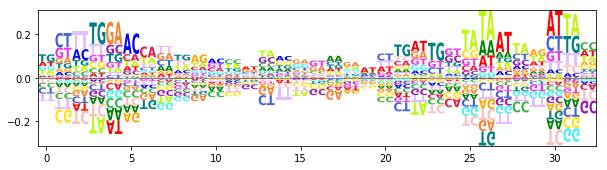

In [17]:
logomaker.Logo(nbr_df)

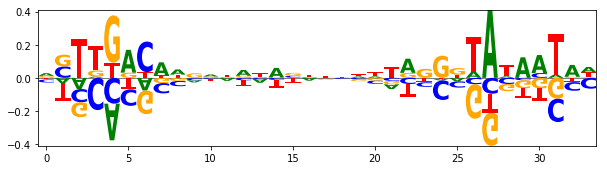

In [18]:
logomaker.Logo(mat_df)

Text(0.5, 1.0, 'CRP WT binding site')

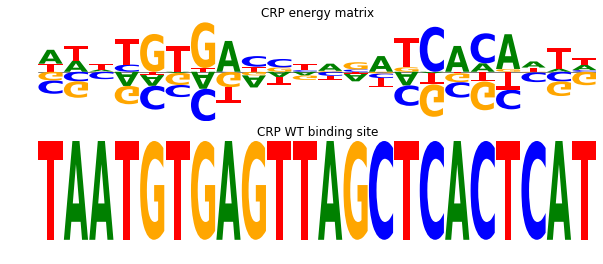

In [30]:
fig, axs = plt.subplots(2,1, figsize=[10,4])

# Read in CRP mat and show logo
ax = axs[0]
crp_mat_df = pd.read_csv('full-wt_IM_crp.txt', delim_whitespace=True, index_col=0)
crp_mat_df.reset_index(inplace=True, drop=True)
crp_mat_df.columns = [col[-1] for col in crp_mat_df.columns]
logomaker.Logo(crp_mat_df, ax=ax)
ax.axis('off')
ax.set_title('CRP energy matrix')

# Show logo for wt sequence
ax = axs[1]
crp_site = 'TAATGTGAGTTAGCTCACTCAT'
len(crp_site)
crp_wt_df = logomaker.sequence_to_matrix(crp_site)
logomaker.Logo(crp_wt_df, ax=ax)
ax.axis('off')
ax.set_title('CRP WT binding site')


Text(0.5, 1.0, 'RNAP WT binding site')

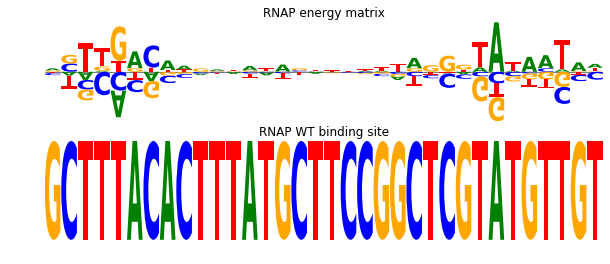

In [31]:
fig, axs = plt.subplots(2,1, figsize=[10,4])

# Read in CRP mat and show logo
ax = axs[0]
rnap_mat_df = pd.read_csv('full-wt_IM_rnap.txt', delim_whitespace=True, index_col=0)
rnap_mat_df.reset_index(inplace=True, drop=True)
rnap_mat_df.columns = [col[-1] for col in rnap_mat_df.columns]
logomaker.Logo(rnap_mat_df, ax=ax)
ax.axis('off')
ax.set_title('RNAP energy matrix')

# Show logo for wt sequence
ax = axs[1]
rnap_site = 'GCTTTACACTTTATGCTTCCGGCTCGTATGTTGT'
len(rnap_site)
rnap_wt_df = logomaker.sequence_to_matrix(rnap_site)
logomaker.Logo(rnap_wt_df, ax=ax)
ax.axis('off')
ax.set_title('RNAP WT binding site')
